# Importing the Libraries

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Loading the Dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Loan%20Application%20Status/loan_prediction.csv")

In [3]:
# printing first 5 rows of the dataset
df.head()

,LP001002,Male,No,0,Graduate,No.1,5849,0.1,Unnamed: 8,360,1,Urban,Y
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [4]:
df_n = df.set_axis(["Loan_Id", "Gender", "Married", "Dependents", "Education", "Self_Employed", "Applicant_Income", "CoapplicantIncome", "Loan_Amount", "Loan_amount_Term", "Credit_History", "Property_Area", "Loan_status"], axis=1)
df_n.head()

,Loan_Id,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,CoapplicantIncome,Loan_Amount,Loan_amount_Term,Credit_History,Property_Area,Loan_status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


# Exploratory Data Analysis(EDA)

In [5]:
# checking dimensions of the dataset
df_n.shape

(613, 13)

In [6]:
# printing the columns of the datset
df_n.columns.tolist()

['Loan_Id',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Applicant_Income',
 'CoapplicantIncome',
 'Loan_Amount',
 'Loan_amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_status']

In [7]:
# checkinh the info of the datset
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_Id            613 non-null    object 
 1   Gender             600 non-null    object 
 2   Married            610 non-null    object 
 3   Dependents         598 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      581 non-null    object 
 6   Applicant_Income   613 non-null    int64  
 7   CoapplicantIncome  613 non-null    float64
 8   Loan_Amount        592 non-null    float64
 9   Loan_amount_Term   599 non-null    float64
 10  Credit_History     563 non-null    float64
 11  Property_Area      613 non-null    object 
 12  Loan_status        613 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [8]:
df_n.describe()

,Applicant_Income,CoapplicantIncome,Loan_Amount,Loan_amount_Term,Credit_History
count,613.000000,613.000000,592.000000,599.000000,563.000000
mean,5402.732463,1623.890571,146.412162,341.969950,0.841918
std,6114.004114,2927.903583,85.587325,65.170672,0.365142
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3812.000000,1210.000000,128.000000,360.000000,1.000000
75%,5780.000000,2302.000000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [9]:
# checking for the missing values
df_n.isnull().sum()

Loan_Id               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
Applicant_Income      0
CoapplicantIncome     0
Loan_Amount          21
Loan_amount_Term     14
Credit_History       50
Property_Area         0
Loan_status           0
dtype: int64

First we will fill the Missing Values in 'Loan_Amount' and 'Credit_History' by the 'Mean' and 'Median' of the respective varialbe.

In [10]:
df_n['Loan_Amount'] = df_n['Loan_Amount'].fillna(df_n['Loan_Amount'].mean())
df_n['Credit_History'] = df_n['Credit_History'].fillna(df_n['Credit_History'].median())

#### Let's confirm if there are any missing values in 'Loan_Amount' & 'Credit_History'

In [11]:
df_n.isnull().sum()

Loan_Id               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
Applicant_Income      0
CoapplicantIncome     0
Loan_Amount           0
Loan_amount_Term     14
Credit_History        0
Property_Area         0
Loan_status           0
dtype: int64

#### Now, Let's drop all the missing values remaining.

In [12]:
df_n.dropna(inplace=True)

#### Let's check the Missing values for the final time!

In [13]:
df_n.isnull().sum()

Loan_Id              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Applicant_Income     0
CoapplicantIncome    0
Loan_Amount          0
Loan_amount_Term     0
Credit_History       0
Property_Area        0
Loan_status          0
dtype: int64

Here, we have dropped all the missing values to avoid disturbances in the model. The Loan Prediction requires all the details to work efficiently and thus the missing values are dropped.

### Now, Let's check the final Dataset Shape.

In [14]:
df_n.shape

(541, 13)

In [77]:
df_new = df_n.drop("Loan_Id", axis=1)
df_new.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,CoapplicantIncome,Loan_Amount,Loan_amount_Term,Credit_History,Property_Area,Loan_status
0,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
2,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
3,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
4,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


# Data Visualization

## Comparison between Genders in getting the Loan

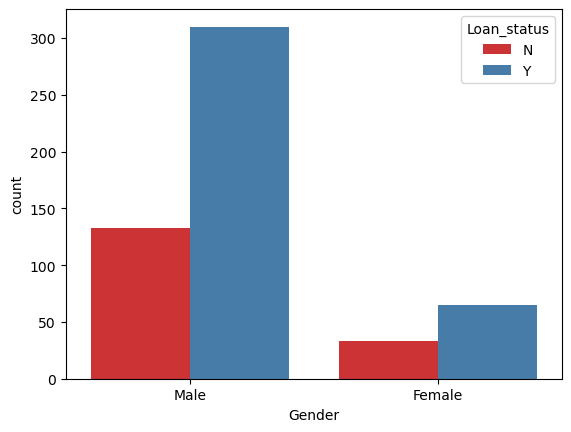

In [25]:
figsize=6,7
sns.countplot(data=df_n, x='Gender', hue='Loan_status', palette='Set1')
plt.show()

Here, we can see that the Males have more chances to get the Loan.

## Comparison between Married Status in getting the Loan

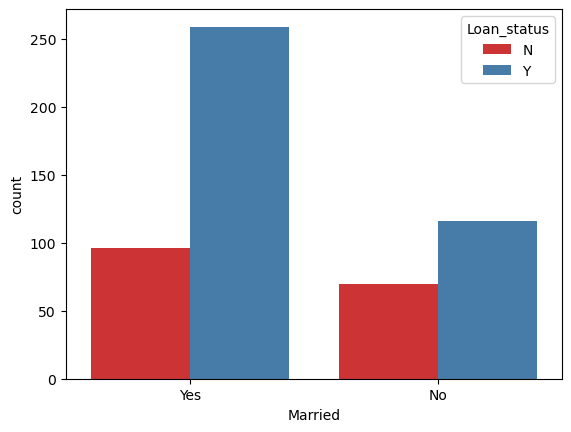

In [26]:
figsize=6,7
sns.countplot(data=df_n, x='Married', hue='Loan_status', palette='Set1')
plt.show()

Here, we can see that the Married Person has more chance of getting the Loan.

## Comparison between Education Status of an Individual in getting the Loan

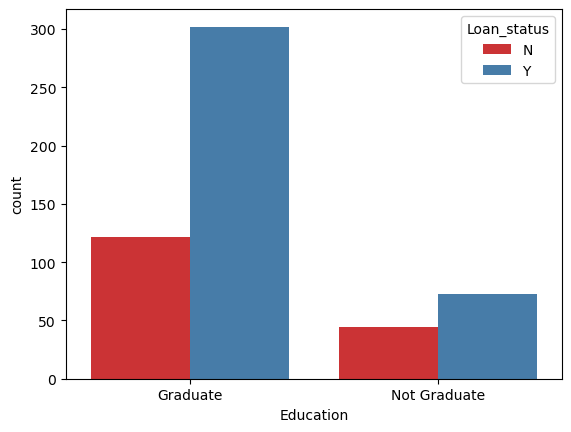

In [27]:
figsize=6,7
sns.countplot(data=df_n, x='Education', hue='Loan_status', palette='Set1')
plt.show()

Here, we can see that a Graduate Individual has more chance of getting the Loan.

## Comparison between Self-Employed or Not in getting the Loan

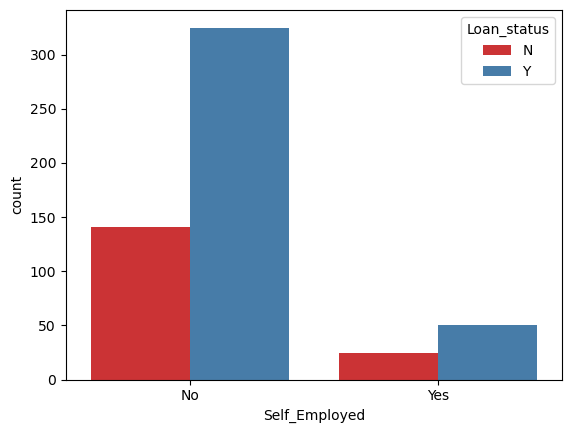

In [28]:
figsize=6,7
sns.countplot(data=df_n, x='Self_Employed', hue='Loan_status', palette='Set1')
plt.show()

Here, we can see that Not Self-Employed has more chance of getting the Loan.

## Comparison between Property Area for getting the Loan

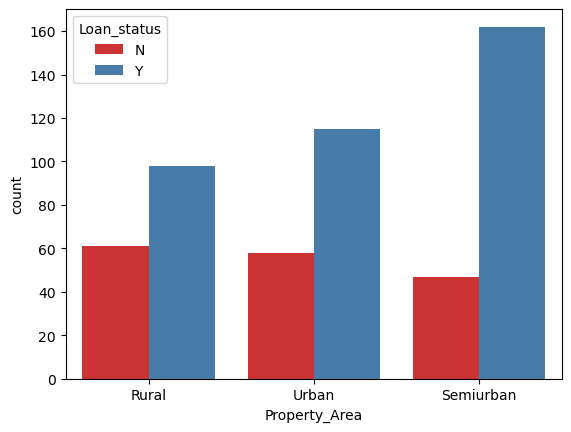

In [29]:
figsize=6,7
sns.countplot(data=df_n, x='Property_Area', hue='Loan_status', palette='Set1')
plt.show()

Here, we can see that People living in Semi-Urban Area have more chance to get the Loan.

## Let's replace the Variable values to Numerical form & display the Value Counts.

The data in Numerical form avoids disturbances in building the model.

In [31]:
df_n['Loan_status'].replace('Y',1,inplace=True)
df_n['Loan_status'].replace('N',0,inplace=True)

In [33]:
df_n['Loan_status'].value_counts()

Loan_status
1    375
0    166
Name: count, dtype: int64

In [34]:
df_n.Gender=df_n.Gender.map({'Male':1,'Female':0})
df_n['Gender'].value_counts()

Gender
1    443
0     98
Name: count, dtype: int64

In [35]:
df_n.Married=df_n.Married.map({'Yes':1,'No':0})
df_n['Married'].value_counts()

Married
1    355
0    186
Name: count, dtype: int64

In [36]:
df_n.Dependents=df_n.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
df_n['Dependents'].value_counts()

Dependents
0    308
1     94
2     94
3     45
Name: count, dtype: int64

In [37]:
df_n.Education=df_n.Education.map({'Graduate':1,'Not Graduate':0})
df_n['Education'].value_counts()

Education
1    424
0    117
Name: count, dtype: int64

In [38]:
df_n.Self_Employed=df_n.Self_Employed.map({'Yes':1,'No':0})
df_n['Self_Employed'].value_counts()

Self_Employed
0    466
1     75
Name: count, dtype: int64

In [39]:
df_n.Property_Area=df_n.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
df_n['Property_Area'].value_counts()

Property_Area
1    209
2    173
0    159
Name: count, dtype: int64

In [42]:
df_n['Loan_Amount'].value_counts()

Loan_Amount
146.412162    18
120.000000    15
100.000000    14
110.000000    13
187.000000    12
              ..
280.000000     1
240.000000     1
214.000000     1
59.000000      1
253.000000     1
Name: count, Length: 195, dtype: int64

In [44]:
df_n['Loan_amount_Term'].value_counts()

Loan_amount_Term
360.0    463
180.0     38
480.0     13
300.0     12
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [45]:
df_n['Credit_History'].value_counts()

Credit_History
1.0    467
0.0     74
Name: count, dtype: int64

# Display the Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix for Loan Status')

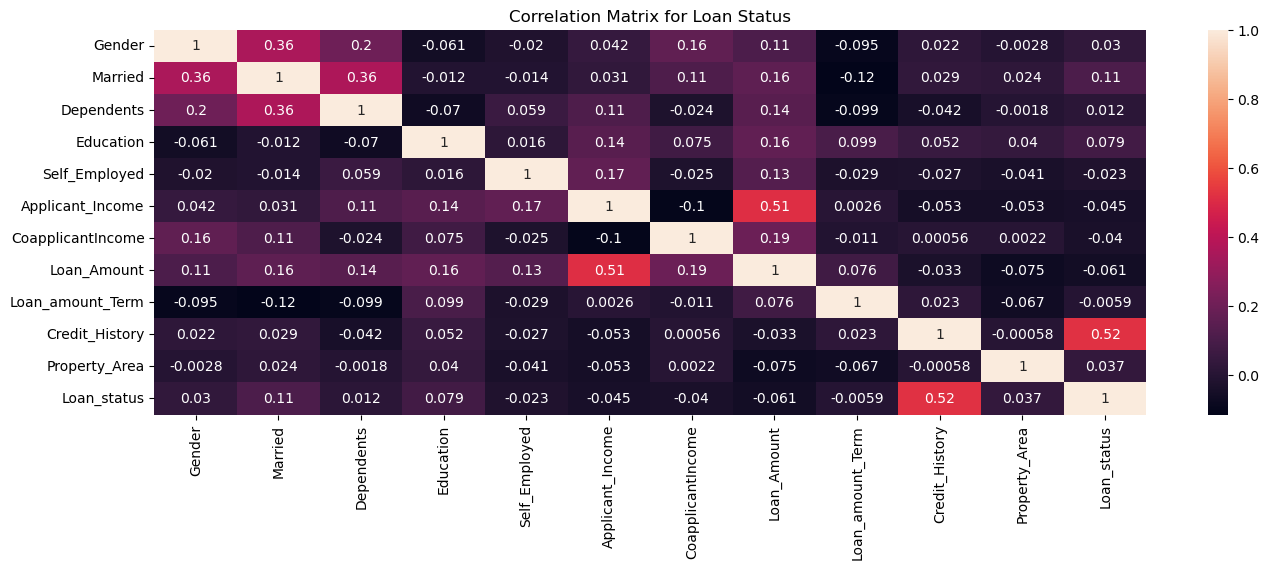

In [78]:
plt.figure(figsize=(16,5))
sns.heatmap(df_new.corr(),annot=True)
plt.title('Correlation Matrix for Loan Status')

From the above figure, we can see that Credit_History (Independent Variable) has the maximum correlation with Loan_Status (Dependent Variable). Which denotes that the Loan_Status is heavily dependent on the Credit_History.

# Final DataFrame

In [48]:
df_n.head()

,Loan_Id,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,CoapplicantIncome,Loan_Amount,Loan_amount_Term,Credit_History,Property_Area,Loan_status
0,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
1,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
2,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
3,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
4,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


## Splitting the data into Train and Test set

In [49]:
X = df_n.iloc[1:542,1:12].values
y = df_n.iloc[1:542,12].values

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [51]:
print(X_train)

[[  1.   1.   1. ... 360.   1.   2.]
 [  1.   1.   0. ... 360.   1.   0.]
 [  0.   1.   0. ... 360.   1.   1.]
 ...
 [  1.   1.   2. ... 360.   1.   2.]
 [  0.   0.   1. ... 360.   1.   1.]
 [  1.   1.   0. ... 360.   0.   2.]]


In [52]:
print(X_test)

[[  1.   1.   0. ... 360.   1.   1.]
 [  1.   1.   2. ... 360.   0.   0.]
 [  0.   1.   0. ... 360.   1.   1.]
 ...
 [  1.   1.   0. ... 360.   1.   0.]
 [  1.   1.   0. ... 360.   1.   2.]
 [  1.   1.   0. ... 360.   1.   1.]]


In [53]:
print(y_train)

[1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1
 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 0 0 1
 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1
 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1
 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0
 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1
 1 1 1 0 1 1 0 0]


# Logistic Regression (LR)

In [54]:
model = LogisticRegression()
model.fit(X_train,y_train)

lr_prediction = model.predict(X_test)
print('Logistic Regression accuracy = ', metrics.accuracy_score(lr_prediction,y_test))

Logistic Regression accuracy =  0.7777777777777778


## Support Vector Machine (SVM)

In [55]:
model = svm.SVC()
model.fit(X_train,y_train)

svc_prediction = model.predict(X_test)
print('SVM accuracy = ', metrics.accuracy_score(svc_prediction,y_test))

SVM accuracy =  0.691358024691358


# Decision Tree

In [56]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

dt_prediction = model.predict(X_test)
print('Decision Tree accuracy = ', metrics.accuracy_score(dt_prediction,y_test))

Decision Tree accuracy =  0.7222222222222222


# K-Nearest Neighbors (KNN)

In [57]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)

knn_prediction = model.predict(X_test)
print('KNN accuracy = ', metrics.accuracy_score(knn_prediction,y_test))

KNN accuracy =  0.654320987654321


### CONCLUSION:

The Loan Status is heavily dependent on the Credit History for Predictions.

The Logistic Regression algorithm gives us the maximum Accuracy (77% approx) compared to the other 3 Machine Learning Classification Algorithms.